Epoch [50/500], Loss: 0.1122
Epoch [100/500], Loss: 0.0313
Epoch [150/500], Loss: 0.0251
Epoch [200/500], Loss: 0.0222
Epoch [250/500], Loss: 0.0207
Epoch [300/500], Loss: 0.0198
Epoch [350/500], Loss: 0.0194
Epoch [400/500], Loss: 0.0191
Epoch [450/500], Loss: 0.0190
Epoch [500/500], Loss: 0.0189


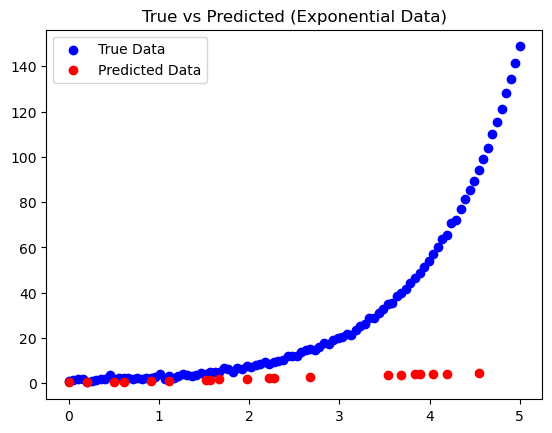

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 生成指数函数数据
x = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.exp(x) + np.random.normal(0, 0.5, size=x.shape)  # 加入噪声

# 对目标值取对数
y_log = np.log(y)

# 数据划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.2, random_state=42)

# 转换为 PyTorch 张量
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# 定义模型
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

model = RegressionModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 预测
model.eval()
with torch.no_grad():
    y_pred = model(x_test).detach().numpy()

# 还原预测值
y_pred_exp = y_pred # 对数还原

# 可视化
plt.scatter(x, np.exp(y_log), label="True Data", color="blue")
plt.scatter(x_test.numpy(), y_pred_exp, label="Predicted Data", color="red")
plt.title("True vs Predicted (Exponential Data)")
plt.legend()
plt.show()


Epoch [50/500], Loss: 0.0001
Epoch [100/500], Loss: 0.0000
Epoch [150/500], Loss: 0.0000
Epoch [200/500], Loss: 0.0000
Epoch [250/500], Loss: 0.0000
Epoch [300/500], Loss: 0.0000
Epoch [350/500], Loss: 0.0000
Epoch [400/500], Loss: 0.0000
Epoch [450/500], Loss: 0.0000
Epoch [500/500], Loss: 0.0000


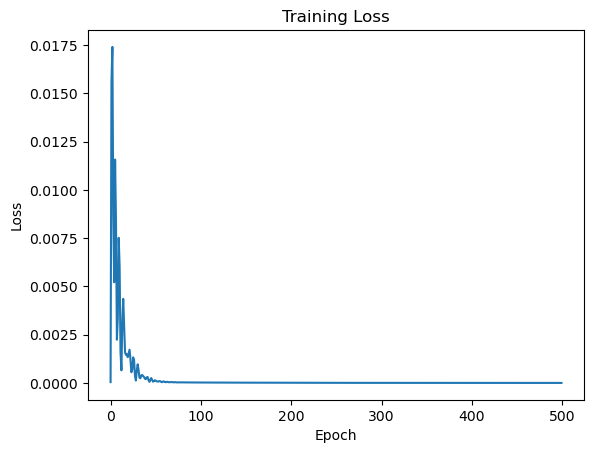

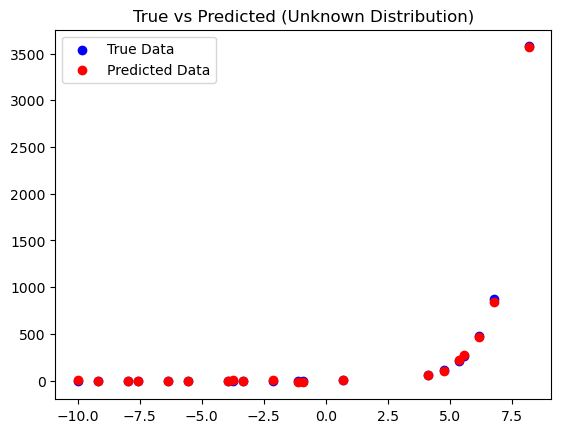

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from sklearn.preprocessing import StandardScaler

# Code Task 11 Train a neural network where the network architecture is up to you. You should use squared error as the cost function. You must use pytorch to do this. (8 marks)
import torch
from torch import nn
from torch.utils.data import DataLoader
from sklearn.preprocessing import PolynomialFeatures



# 生成未知非线性数据
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = np.exp(x) + np.random.normal(0, 0.5, size=x.shape)  # 加入噪声

# 数据划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 数据标准化
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 构建神经网络模型
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

Model = RegressionModel()

# 定义损失函数和优化器
# criterion = nn.SmoothL1Loss()  # Huber 损失
criterion = nn.MSELoss() # Huber 损失

optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
epochs = 500
train_losses = []
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# 可视化损失
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 测试模型
model.eval()
with torch.no_grad():
    y_pred_scaled = model(x_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)  # 反标准化

# 可视化预测结果
plt.scatter(x_test, y_test, label="True Data", color="blue")
plt.scatter(x_test, y_pred, label="Predicted Data", color="red")
plt.title("True vs Predicted (Unknown Distribution)")
plt.legend()
plt.show()


Epoch [50/500], Loss: 0.0002
Epoch [100/500], Loss: 0.0001
Epoch [150/500], Loss: 0.0001
Epoch [200/500], Loss: 0.0001
Epoch [250/500], Loss: 0.0001
Epoch [300/500], Loss: 0.0001
Epoch [350/500], Loss: 0.0001
Epoch [400/500], Loss: 0.0001
Epoch [450/500], Loss: 0.0001
Epoch [500/500], Loss: 0.0001


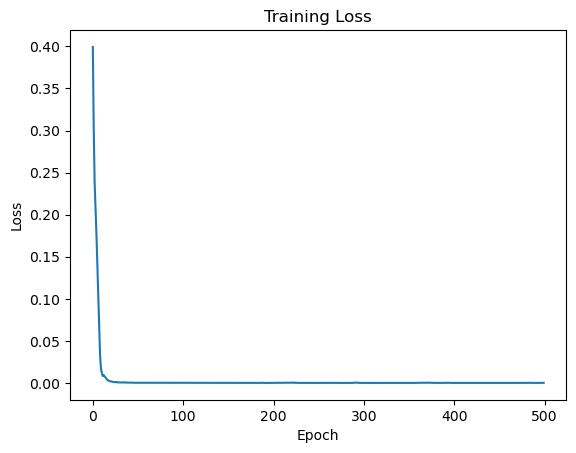

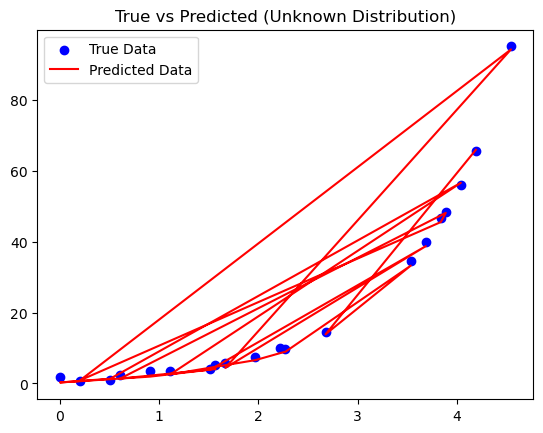

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 生成未知非线性数据
x = np.linspace(0, 5, 100).reshape(-1, 1)
y = np.exp(x) + np.random.normal(0, 0.5, size=x.shape)  # 非线性分布加噪声

# 数据划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 数据标准化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 构建数据集和 DataLoader
batch_size = 16
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 2. 构建神经网络模型
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.network(x)

model = RegressionModel()

# 3. 定义损失函数和优化器
criterion = nn.SmoothL1Loss()  # Huber 损失
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# 4. 训练模型
epochs = 500
train_losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    model.train()
    for batch_x, batch_y in train_loader:  # 小批量训练
        optimizer.zero_grad()
        y_pred = model(batch_x)
        loss = criterion(y_pred, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    train_losses.append(epoch_loss / len(train_loader))  # 记录每个 epoch 的平均损失
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# 可视化损失曲线
plt.plot(train_losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. 测试模型
model.eval()
with torch.no_grad():
    y_pred_scaled = model(x_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)  # 反标准化预测结果

# 6. 可视化预测结果
plt.scatter(x_test, y_test, label="True Data", color="blue")
plt.plot(x_test, y_pred, label="Predicted Data", color="red")
plt.title("True vs Predicted (Unknown Distribution)")
plt.legend()
plt.show()


In [39]:
# 生成未知非线性数据
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = np.exp(x) + np.random.normal(0, 0.5, size=x.shape)  # 加入噪声

# 数据划分
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


# x = torch.tensor(x_train, dtype=torch.float32).numpy() 
# y = torch.tensor(y_train, dtype=torch.float32).numpy()


# scaler_x = StandardScaler()
# scaler_y = StandardScaler()
# x_scaled = scaler_x.fit_transform(x) 
# y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)) 


# x_train_tensor = torch.tensor(x_scaled, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_scaled, dtype=torch.float32)
# training_data = TensorDataset(x_train_tensor, y_train_tensor)

# # Create data loaders.
# batch_size = 64
# train_dataloader = DataLoader(training_data, batch_size=batch_size)
# 数据标准化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

# 构建数据集和 DataLoader
batch_size = 16
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 128),  
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Dropout(p=0.0)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

NN_model = NeuralNetwork().to(device)
print(NN_model)

loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(NN_model.parameters(), lr=0.001)

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        

        # Backpropagation
        loss.backward()
        optimizer.step()
        

        total_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    avg_loss = total_loss / len(dataloader)
    return avg_loss


epochs = 2000
losses = []
for t in range(epochs):
    epoch_loss = train(train_dataloader, NN_model, loss_fn, optimizer)
    
    losses.append(epoch_loss)
    
print("Done!")




Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Dropout(p=0.0, inplace=False)
  )
)
loss: 1.209907  [   64/   80]
loss: 1.134352  [   64/   80]
loss: 1.078707  [   64/   80]
loss: 1.039624  [   64/   80]
loss: 1.008747  [   64/   80]
loss: 0.986713  [   64/   80]
loss: 0.966485  [   64/   80]
loss: 0.942367  [   64/   80]
loss: 0.919917  [   64/   80]
loss: 0.896166  [   64/   80]
loss: 0.871514  [   64/   80]
loss: 0.846463  [   64/   80]
loss: 0.819702  [   64/   80]
loss: 0.791708  [   64/   80]
loss: 0.764320  [   64/   80]
loss: 0.735828  [   64/   80]
loss: 0.707772  [   64/   80]
loss: 0.680462  [   64/   80]
loss: 0.655200

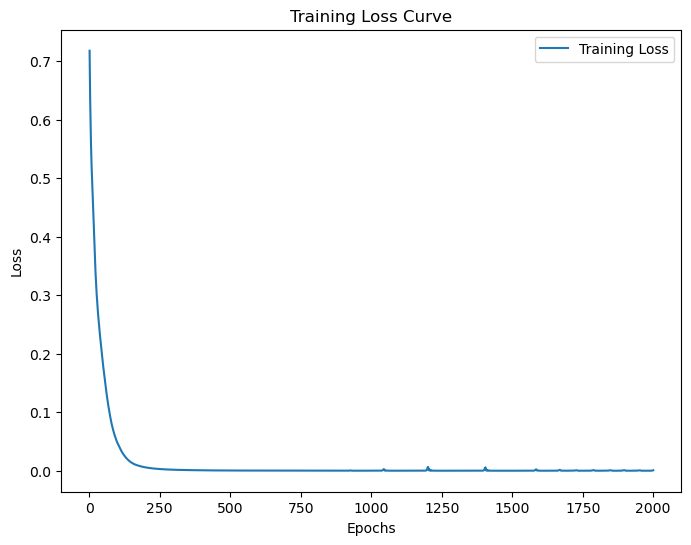

In [32]:

# 绘制损失曲线
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()


In [33]:
# x_test_scaled = scaler_x.transform(x_test)
# x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32).to(device)

NN_model.eval()  
with torch.no_grad():
    y_pred_scaled = NN_model(x_test_tensor) 
    NN_y_pred = scaler_y.inverse_transform(y_pred_scaled.cpu().numpy())


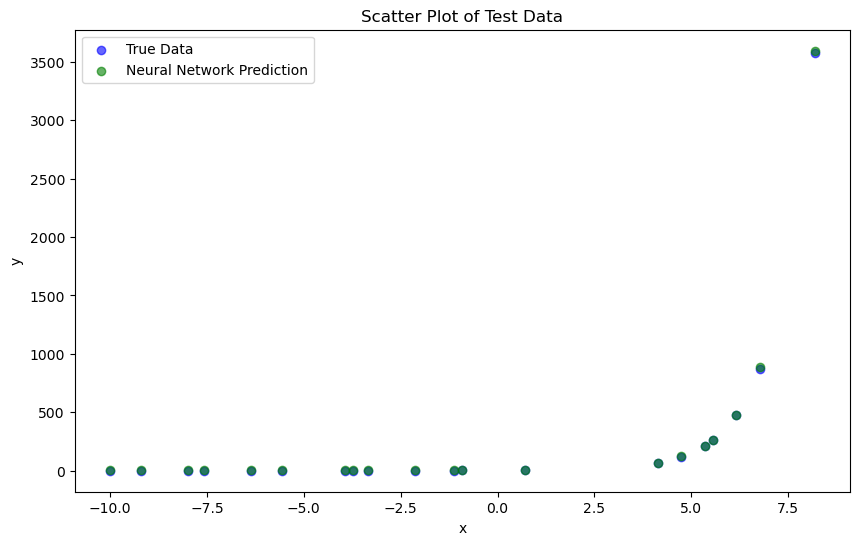

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label="True Data", alpha=0.6, color="blue")
plt.scatter(x_test, NN_y_pred, label="Neural Network Prediction", color="green", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot of Test Data")
plt.legend()
plt.show()




In [54]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 1. 生成未知非线性数据
x = np.linspace(-10, 10, 100).reshape(-1, 1)
y = np.exp(x) + np.random.normal(0, 0.5, size=x.shape)  # 非线性分布加噪声

# 数据划分
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 数据标准化
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

# 转换为 PyTorch 张量
x_train_tensor = torch.tensor(x_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_scaled, dtype=torch.float32)

# 构建数据集和 DataLoader
batch_size = 16
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 设备设置
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# 2. 定义模型
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 128),  
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1),
            nn.Dropout(p=0.0)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

NN_model = NeuralNetwork().to(device)
print(NN_model)

# 3. 定义损失函数和优化器
loss_fn = nn.MSELoss()
optimizer = torch.optim.AdamW(NN_model.parameters(), lr=0.001)

# 4. 训练函数
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    total_loss = 0.0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        optimizer.zero_grad()
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
        
    avg_loss = total_loss / len(dataloader)
    return avg_loss

# 5. 开始训练
epochs = 2000
losses = []
for t in range(epochs):
    epoch_loss = train(train_loader, NN_model, loss_fn, optimizer)
    if (t + 1) % 50 == 0:
        print(f"Epoch {t+1}: Avg Loss = {epoch_loss:.6f}")
    losses.append(epoch_loss)

print("Training completed!")




Using cpu device
NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=1, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
    (7): Dropout(p=0.0, inplace=False)
  )
)
loss: 0.327695  [   16/   80]
loss: 0.327583  [   16/   80]
loss: 2.183069  [   16/   80]
loss: 2.425169  [   16/   80]
loss: 0.389154  [   16/   80]
loss: 0.425773  [   16/   80]
loss: 0.144356  [   16/   80]
loss: 0.099776  [   16/   80]
loss: 0.136414  [   16/   80]
loss: 0.110282  [   16/   80]
loss: 0.871270  [   16/   80]
loss: 0.236242  [   16/   80]
loss: 0.028732  [   16/   80]
loss: 0.250763  [   16/   80]
loss: 0.097354  [   16/   80]
loss: 0.069892  [   16/   80]
loss: 0.361768  [   16/   80]
loss: 0.763538  [   16/   80]
loss: 0.112900  [   16/   80]
loss: 0.553818  [   16/   80]


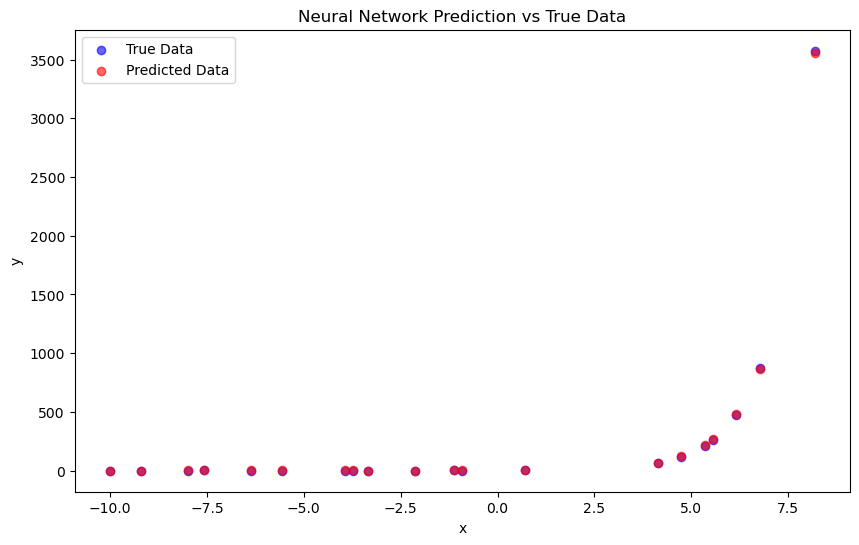

In [55]:
# 6. 模型测试和可视化
x_test_scaled = scaler_x.transform(x_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_scaled, dtype=torch.float32)

NN_model.eval()
with torch.no_grad():
    y_pred_scaled = NN_model(x_test_tensor.to(device)) 
    NN_y_pred = scaler_y.inverse_transform(y_pred_scaled.cpu().numpy())  # 反标准化预测结果

plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, label="True Data", alpha=0.6, color="blue")
plt.scatter(x_test, NN_y_pred, label="Predicted Data", color="red", alpha=0.6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Neural Network Prediction vs True Data")
plt.legend()
plt.show()